<a href="https://colab.research.google.com/github/harshithaprasadprasad/House-Price-prediction-/blob/main/houseprice_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving house-prices-advanced-regression-techniques.zip to house-prices-advanced-regression-techniques.zip
Dataset Shape: (1460, 81)
Columns: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2'],
      dtype='object')


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


✅ Model Coefficients: [   104.02630701 -26655.16535734  30014.32410896]
✅ Intercept: 52261.74862694461
✅ RMSE: 52975.71771338122
✅ R² Score: 0.6341189942328371


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

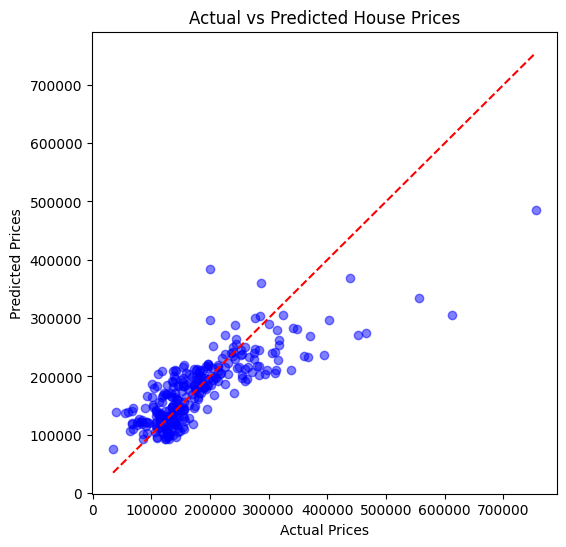

Predictions saved in predictions.csv


In [3]:
# =======================================
# House Price Prediction (Linear Regression)
# =======================================

# Step 1: Install & Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Upload Kaggle dataset file (train.csv)
from google.colab import files
uploaded = files.upload()

# Extract the zip file
for fn in uploaded.keys():
  zip_ref = zipfile.ZipFile(fn, 'r')
  zip_ref.extractall('.')
  zip_ref.close()

# Load dataset
data = pd.read_csv("train.csv")

# Step 3: Quick check
print("Dataset Shape:", data.shape)
print("Columns:", data.columns[:15])  # show first 15 columns
display(data.head())

# Step 4: Select features (Square footage, Bedrooms, Bathrooms)
X = data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y = data['SalePrice']

# Step 5: Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 6: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Predictions
y_pred = model.predict(X_test)

# Step 8: Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("✅ Model Coefficients:", model.coef_)
print("✅ Intercept:", model.intercept_)
print("✅ RMSE:", rmse)
print("✅ R² Score:", r2)

# Step 9: Save Predictions to CSV
output = pd.DataFrame({'Actual Price': y_test.values, 'Predicted Price': y_pred})
output.to_csv("predictions.csv", index=False)

# Download predictions
from google.colab import files
files.download("predictions.csv")

# Step 10: Visualization
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # diagonal line
plt.show()


# Save predictions
output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
output.to_csv("predictions.csv", index=False)
print("Predictions saved in predictions.csv")

Saving house-prices-advanced-regression-techniques.zip to house-prices-advanced-regression-techniques (2).zip
Mean Squared Error: 2806426667.247853
R² Score: 0.6341189942328371

Model Coefficients:
SquareFootage: 104.0263070122644
Bedrooms: -26655.16535734126
Bathrooms: 30014.324108956596
Intercept: 52261.74862694461


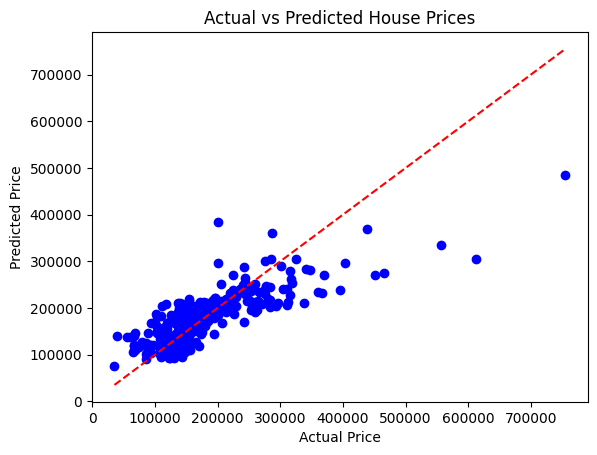

In [4]:
# Install dependencies (if not already installed in Colab)
!pip install scikit-learn pandas matplotlib

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# -------------------------------
# Step 1: Create or Load Dataset
# -------------------------------
# Example dataset (you can replace this with your own CSV file)
# data = {
#     "SquareFootage": [1500, 1800, 2400, 3000, 3500, 4000, 2800, 2200, 2600, 3200],
#     "Bedrooms": [3, 4, 3, 5, 4, 5, 4, 3, 4, 5],
#     "Bathrooms": [2, 2, 3, 3, 4, 4, 3, 2, 3, 3],
#     "Price": [300000, 400000, 500000, 600000, 650000, 700000, 580000, 420000, 520000, 640000]
# }

# df = pd.DataFrame(data)

# Load dataset from uploaded zip file
from google.colab import files
uploaded = files.upload()

# Extract the zip file
for fn in uploaded.keys():
  zip_ref = zipfile.ZipFile(fn, 'r')
  zip_ref.extractall('.')
  zip_ref.close()

# Load dataset
df = pd.read_csv("train.csv")


# -------------------------------
# Step 2: Features (X) & Target (y)
# -------------------------------
# Select features (Square footage, Bedrooms, Bathrooms) from the loaded dataset
X = df[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y = df['SalePrice']

# -------------------------------
# Step 3: Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------
# Step 4: Train Model
# -------------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# -------------------------------
# Step 5: Predictions
# -------------------------------
y_pred = model.predict(X_test)

# -------------------------------
# Step 6: Evaluation
# -------------------------------
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Model coefficients
print("\nModel Coefficients:")
print("SquareFootage:", model.coef_[0])
print("Bedrooms:", model.coef_[1])
print("Bathrooms:", model.coef_[2])
print("Intercept:", model.intercept_)

# -------------------------------
# Step 7: Example Prediction
# -------------------------------
# example_house = [[2500, 4, 3]]  # 2500 sqft, 4 bedrooms, 3 bathrooms
# predicted_price = model.predict(example_house)
# print(f"\nPredicted Price for {example_house}: ${predicted_price[0]:,.2f}")

# -------------------------------
# Step 8: Plot Actual vs Predicted
# -------------------------------
plt.scatter(y_test, y_pred, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

# Remove unnecessary file upload and read_zip calls
# from google.colab import files
# uploaded = files.upload()

# import pandas as pd
# df = pd.read_zip("/content/drive/MyDrive/house-prices-advanced-regression-techniques.zip")